In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1782, 0.9806, 0.1857],
        [0.1932, 0.3899, 0.1572],
        [0.0269, 0.6655, 0.1738],
        [0.5738, 0.4027, 0.6891],
        [0.5755, 0.7828, 0.7349]])


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [3]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(5000)
print(df.shape) ##first 5000 

(568454, 10)
(5000, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


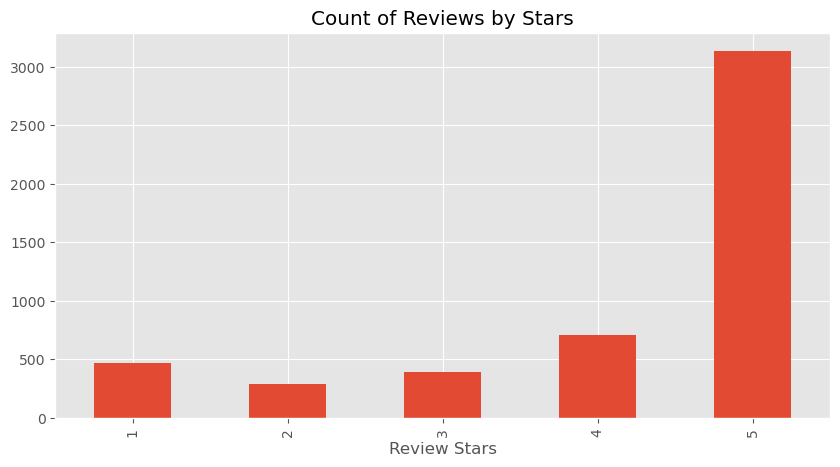

In [6]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()
##value count- number of times each occurs and sort them

In [7]:
##nltk example
example = df['Text'][500]
print(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [8]:
##nltk can tokenize - splits parts of words you need 
##to convert language such that machine can understand
##that is tokeniser
tokens = nltk.word_tokenize(example)
x=tokens[:100]
print(x)

['I', 'bought', 'these', 'for', 'the', 'office', 'and', 'no', 'one', 'can', 'put', 'them', 'down', '.', 'I', "'m", 'ordering', 'more', 'today', 'and', 'it', 'has', 'only', 'been', '2', 'weeks', '.', 'Did', "n't", 'have', 'to', 'shop', 'for', 'them', 'either', ',', 'Amazon', 'brought', 'it', 'to', 'my', 'door', '!']


In [9]:
import nltk
nltk.download('brown')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [10]:
tagged = nltk.pos_tag(tokens) ##each token and parts of speech
##first 100 as example
tagged[:100]
##part of speech like NN is singular noun

[('I', 'PRP'),
 ('bought', 'VBD'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('office', 'NN'),
 ('and', 'CC'),
 ('no', 'DT'),
 ('one', 'NN'),
 ('can', 'MD'),
 ('put', 'VB'),
 ('them', 'PRP'),
 ('down', 'RP'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('ordering', 'VBG'),
 ('more', 'JJR'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('has', 'VBZ'),
 ('only', 'RB'),
 ('been', 'VBN'),
 ('2', 'CD'),
 ('weeks', 'NNS'),
 ('.', '.'),
 ('Did', 'VBP'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('shop', 'VB'),
 ('for', 'IN'),
 ('them', 'PRP'),
 ('either', 'DT'),
 (',', ','),
 ('Amazon', 'NNP'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('door', 'NN'),
 ('!', '.')]

In [11]:
##grp them in chunk of texts
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()
#pprint-pretty print

(S
  I/PRP
  bought/VBD
  these/DT
  for/IN
  the/DT
  office/NN
  and/CC
  no/DT
  one/NN
  can/MD
  put/VB
  them/PRP
  down/RP
  ./.
  I/PRP
  'm/VBP
  ordering/VBG
  more/JJR
  today/NN
  and/CC
  it/PRP
  has/VBZ
  only/RB
  been/VBN
  2/CD
  weeks/NNS
  ./.
  Did/VBP
  n't/RB
  have/VB
  to/TO
  shop/VB
  for/IN
  them/PRP
  either/DT
  ,/,
  (PERSON Amazon/NNP)
  brought/VBD
  it/PRP
  to/TO
  my/PRP$
  door/NN
  !/.)


In [12]:
import nltk
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
##it takes all the words in sentence and value of positive
##negative and neutral like an math equation but htis approach
##does not account for relationship of words which is important
##it will remove and ,the as they donot have impact
sia = SentimentIntensityAnalyzer()

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sia.polarity_scores('I am so happy!')
##to see sentiment
#neu-neutral
#compound-negative to positive
#this is from 0 to 1

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [17]:
sia.polarity_scores('This is the worst thing ever.')
##more on negative

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
sia.polarity_scores(example)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [19]:
## run the polarity on entire dataset using loop
res = {} ##to store results
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id'] ##row id column
    res[myid] = sia.polarity_scores(text) ##to store in dictonanry
    

  0%|          | 0/5000 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T ## store in pandas to work on it easily
##.t to rotate every thing horizontally
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

vaders = vaders.merge(df, how='left')
##merge with original  from left

In [21]:
##sentiment score 
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


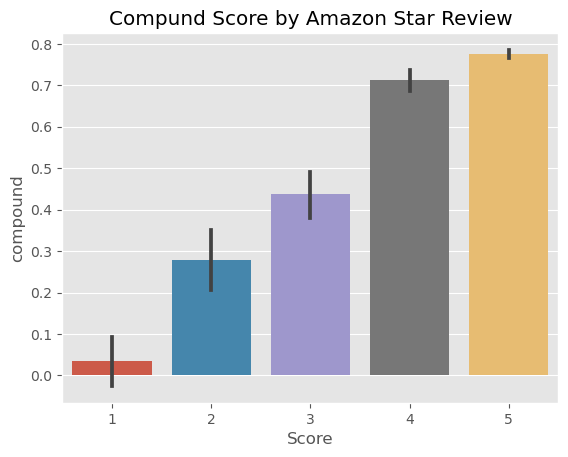

In [22]:
#plot vader results 
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()


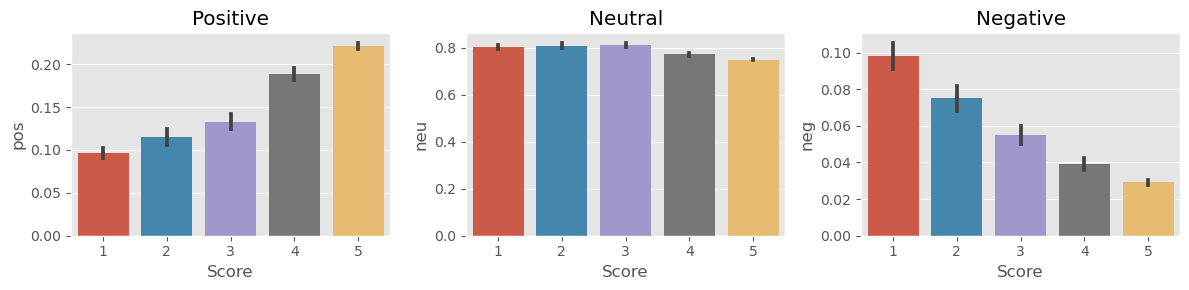

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
## 1 by 3 grid
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
##postive
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout() ## not to overlap labels
plt.show()
##positive is more when score is higher
#vader is valuable

In [24]:
##hugghing face library
from transformers import AutoTokenizer
##this will tokenize
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [25]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"


In [28]:
##earlier
print(example)

sia.polarity_scores(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [29]:
##run for roberta 
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
##output is tensor 
scores = output[0][0].detach().numpy()
##store in numpy
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict) ##scores dictionary
##values in numpy array

{'roberta_neg': 0.007319375, 'roberta_neu': 0.051132586, 'roberta_pos': 0.941548}


In [30]:
##running all over database
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [31]:
res = {}
##iterating over dataset
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        ##combing both of them 
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both##storing in dict
    except RuntimeError: ##it will run but will not run for 
        ##size of texts that it will not run through and print 
        ##mssg
        print(f'Broke for id {myid}')
        


  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
##merging back on original dataset

In [33]:


results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

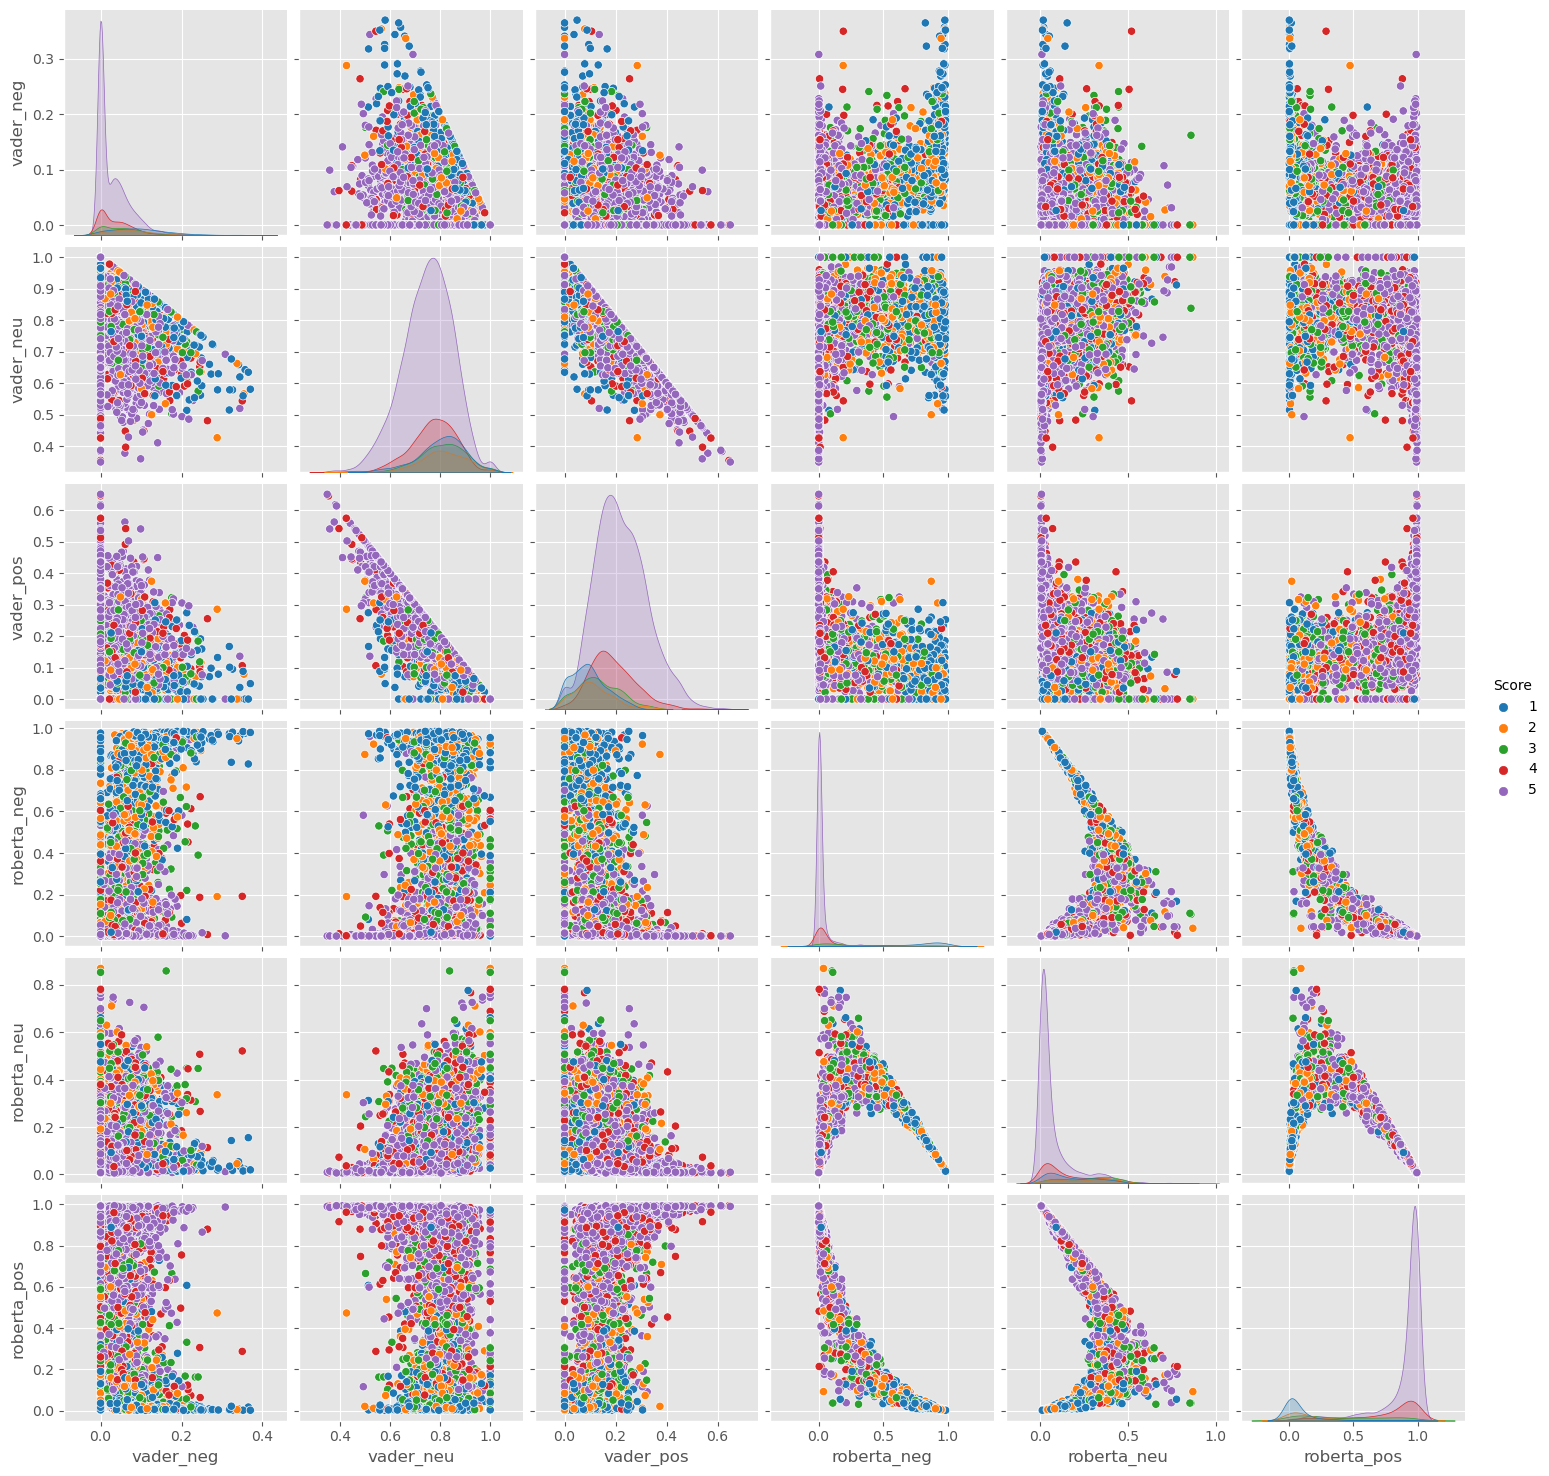

In [34]:
##compare scroes between models
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()


In [35]:
##reviewing examples
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]
##model gave positive but is negative in end 
##most positive for 1 star

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [36]:
##same for vader model
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]
##it is negative and scarcastic

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

In [37]:
##negative sentiment and positive review
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [38]:
##same
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [39]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [40]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [41]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]